In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
DATA_CSV_NAME = "sensitivity_dataset_fixed.csv"

In [3]:
data = pd.read_csv(DATA_CSV_NAME)

In [4]:
list(data.columns)[1:]

['kendall_w',
 'p_lowerbound',
 'max_L2_dist',
 'mean_L2_dist',
 'min_tau',
 'mean_tau',
 'k',
 'model',
 'D',
 'Source',
 'n_items',
 'P',
 'mean_sensitivity(LOPRankingAlgorithm,SwapNoise(0.05))',
 'std_sensitivity(LOPRankingAlgorithm,SwapNoise(0.05))',
 'mean_sensitivity(LOPRankingAlgorithm,BinaryFlipNoise(0.05))',
 'std_sensitivity(LOPRankingAlgorithm,BinaryFlipNoise(0.05))',
 'mean_sensitivity(MasseyRankingAlgorithm,SwapNoise(0.05))',
 'std_sensitivity(MasseyRankingAlgorithm,SwapNoise(0.05))',
 'mean_sensitivity(MasseyRankingAlgorithm,BinaryFlipNoise(0.05))',
 'std_sensitivity(MasseyRankingAlgorithm,BinaryFlipNoise(0.05))',
 'mean_sensitivity(ColleyRankingAlgorithm,SwapNoise(0.05))',
 'std_sensitivity(ColleyRankingAlgorithm,SwapNoise(0.05))',
 'mean_sensitivity(ColleyRankingAlgorithm,BinaryFlipNoise(0.05))',
 'std_sensitivity(ColleyRankingAlgorithm,BinaryFlipNoise(0.05))']

In [5]:
sensitivities = [col for col in data.columns if "mean_sensitivity" in col]
sensitivities

['mean_sensitivity(LOPRankingAlgorithm,SwapNoise(0.05))',
 'mean_sensitivity(LOPRankingAlgorithm,BinaryFlipNoise(0.05))',
 'mean_sensitivity(MasseyRankingAlgorithm,SwapNoise(0.05))',
 'mean_sensitivity(MasseyRankingAlgorithm,BinaryFlipNoise(0.05))',
 'mean_sensitivity(ColleyRankingAlgorithm,SwapNoise(0.05))',
 'mean_sensitivity(ColleyRankingAlgorithm,BinaryFlipNoise(0.05))']

In [6]:
data["overall_mean_sensitivity"] = data[sensitivities].mean(axis=1)

In [7]:
rankability_measures = ["kendall_w", "p_lowerbound", "max_L2_dist", "mean_L2_dist", "min_tau", "mean_tau", "k"]

In [8]:
# TODO (jwaschur): create train/test split for meaningful R_squared

def run_linear_model(X, y, verbose=False):
    if verbose:
        print("##############################")
        print("Linear model:")
        print("Predicting {} from {}".format(y.name, list(X.columns)))
    
    lm = LinearRegression()
    model = lm.fit(X,y)
    
    predictions = lm.predict(X)
    residuals = y - predictions
    R_squared = lm.score(X,y)
    coefficients = lm.coef_
    intercept = lm.intercept_
    
    # Get p-values for each of the parameters
    # Code found at 
    params = np.append(intercept,coefficients)
    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X.reset_index(drop=True)))
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))
    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b
    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)-1))) for i in ts_b]
    
    # Plot the model with predictions if only one predictor
    if len(X.columns) == 1:
        col = X.columns[0]
        plt.scatter(X[col], y, alpha=0.1, color="b")
        plt.plot(X[col], predictions, color="r", label="y = {:.3E}*x + {:.3E}".format(coefficients[0], intercept))
        plt.xlabel(col)
        plt.ylabel(y.name)
        plt.legend()
        plt.title("Linear Model (R^2 = {:.3f}, p = {:.2E})".format(R_squared, p_values[1]))
        plt.show()
        plt.clf()
    else:
        print("\nR^2 = {:.3f}\n".format(R_squared))
        print("{:15}  {:8} (p-value)".format("Predictor", "Coeff"))
        print("---------------------------------------")
        print("{:15}: {:8.4f} (p = {:.2E})".format("Intercept", intercept, p_values[0]))
        for idx, col in enumerate(X.columns):
            print("{:15}: {:8.4f} (p = {:.2E})".format(col, coefficients[idx], p_values[idx+1]))
    
    if verbose:
        # Plot the histogram of residuals
        plt.hist(residuals, bins=30, density=True)
        plt.xlabel("Residual")
        plt.ylabel("Density")
        plt.title("Residual Density Histogram")
        plt.show()

        print("##############################\n")

##############################
Linear model:
Predicting overall_mean_sensitivity from ['kendall_w']


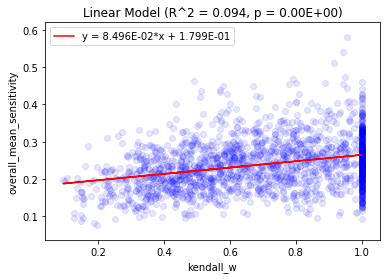

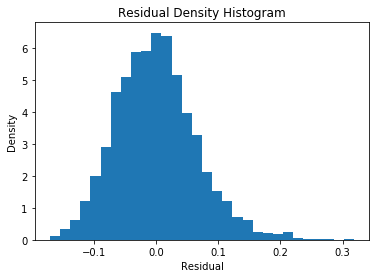

##############################

##############################
Linear model:
Predicting overall_mean_sensitivity from ['p_lowerbound']


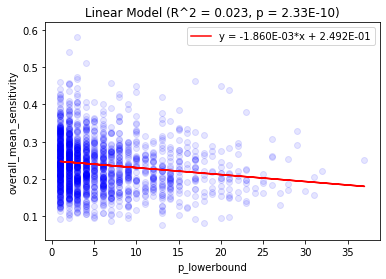

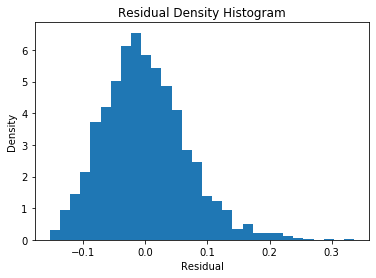

##############################

##############################
Linear model:
Predicting overall_mean_sensitivity from ['max_L2_dist']


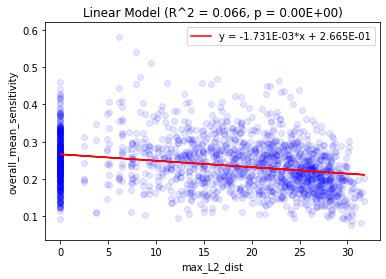

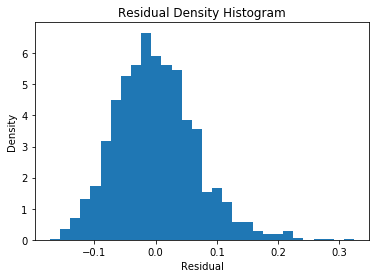

##############################

##############################
Linear model:
Predicting overall_mean_sensitivity from ['mean_L2_dist']


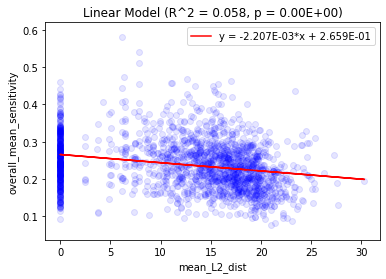

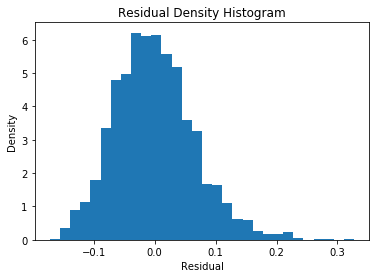

##############################

##############################
Linear model:
Predicting overall_mean_sensitivity from ['min_tau']


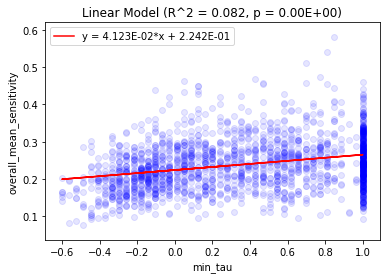

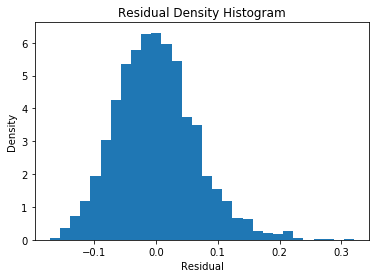

##############################

##############################
Linear model:
Predicting overall_mean_sensitivity from ['mean_tau']


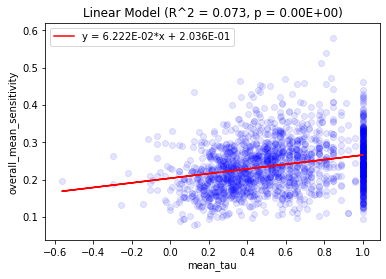

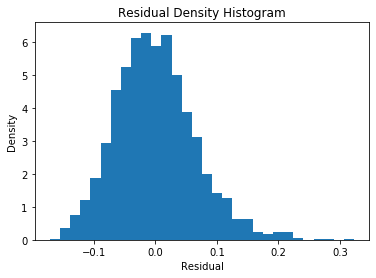

##############################

##############################
Linear model:
Predicting overall_mean_sensitivity from ['k']


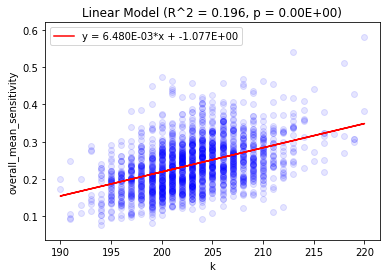

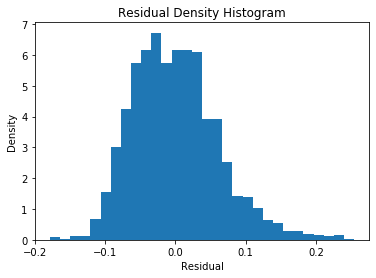

##############################

##############################
Linear model:
Predicting overall_mean_sensitivity from ['kendall_w', 'p_lowerbound', 'max_L2_dist', 'mean_L2_dist', 'min_tau', 'mean_tau', 'k']

R^2 = 0.265

Predictor        Coeff    (p-value)
---------------------------------------
Intercept      :  -1.0178 (p = 0.00E+00)
kendall_w      :   0.1551 (p = 5.33E-07)
p_lowerbound   :   0.0025 (p = 7.08E-09)
max_L2_dist    :   0.0067 (p = 6.53E-03)
mean_L2_dist   :  -0.0067 (p = 1.66E-02)
min_tau        :   0.1318 (p = 5.42E-03)
mean_tau       :  -0.1969 (p = 4.02E-04)
k              :   0.0058 (p = 0.00E+00)


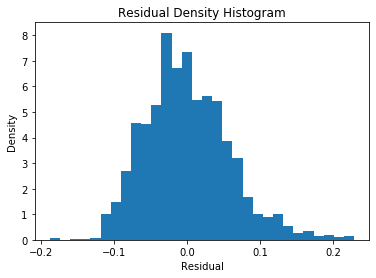

##############################



In [9]:
for measure in rankability_measures:
    X = data[[measure]]
    y = data["overall_mean_sensitivity"]
    run_linear_model(X, y, verbose=True)

run_linear_model(data[rankability_measures],
                 data["overall_mean_sensitivity"],
                 verbose=True)

##############################
Linear model:
Predicting mean_sensitivity(LOPRankingAlgorithm,SwapNoise(0.05)) from ['k']


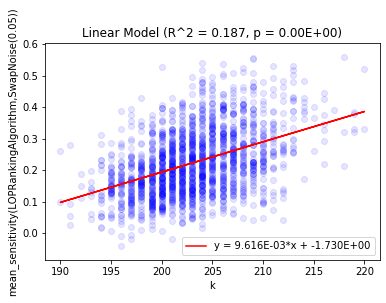

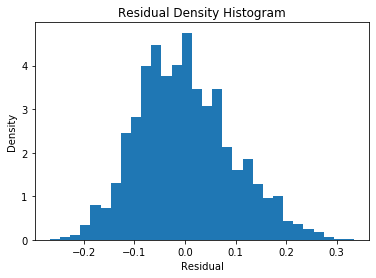

##############################

##############################
Linear model:
Predicting mean_sensitivity(LOPRankingAlgorithm,BinaryFlipNoise(0.05)) from ['k']


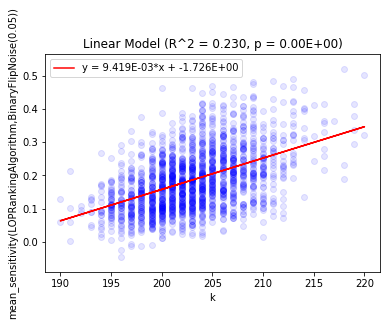

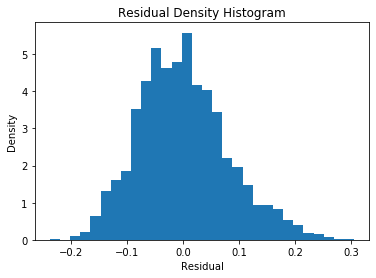

##############################

##############################
Linear model:
Predicting mean_sensitivity(MasseyRankingAlgorithm,SwapNoise(0.05)) from ['k']


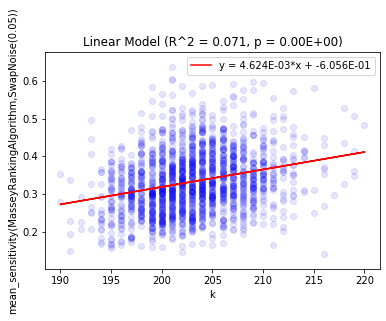

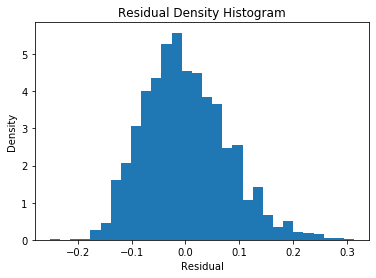

##############################

##############################
Linear model:
Predicting mean_sensitivity(MasseyRankingAlgorithm,BinaryFlipNoise(0.05)) from ['k']


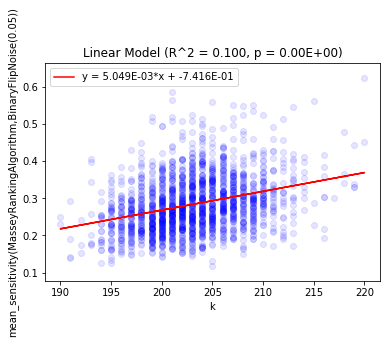

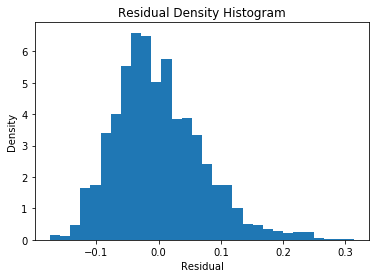

##############################

##############################
Linear model:
Predicting mean_sensitivity(ColleyRankingAlgorithm,SwapNoise(0.05)) from ['k']


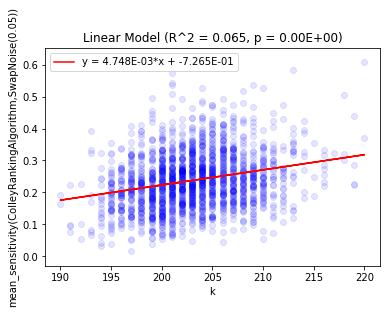

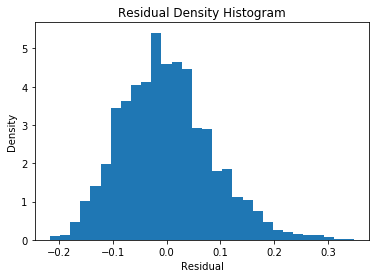

##############################

##############################
Linear model:
Predicting mean_sensitivity(ColleyRankingAlgorithm,BinaryFlipNoise(0.05)) from ['k']


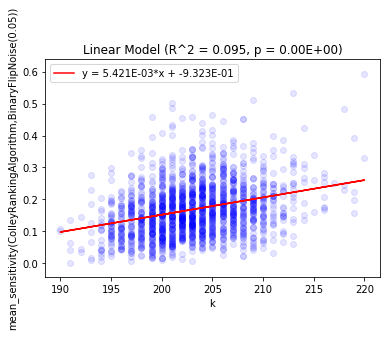

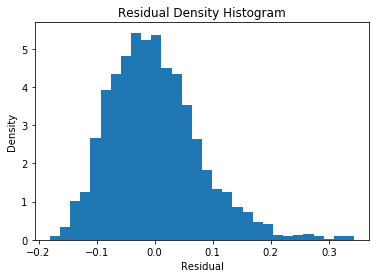

##############################

##############################
Linear model:
Predicting overall_mean_sensitivity from ['k']


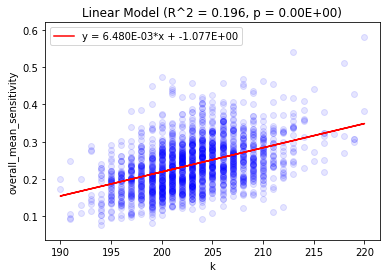

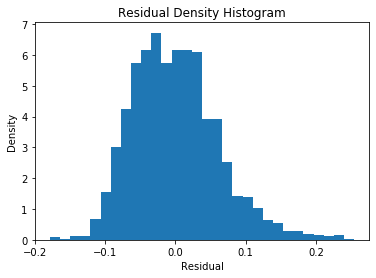

##############################



In [10]:
for sensitivity in sensitivities:
    X = data[["k"]]
    y = data[sensitivity]
    run_linear_model(X, y, verbose=True)

run_linear_model(data[["k"]],
                 data["overall_mean_sensitivity"],
                 verbose=True)